In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
!pip install xarray
!pip install rioxarray
import xarray as xr
import rioxarray


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 3.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.3 MB 9.0 MB/s 
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=7421462b46197c3e0549cea8f88256947b5adfb5e51dd8cb9cd370150d4c0f75
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


In [ ]:
open=('/content/drive/MyDrive/REU_2022_copy/forcing_copy/ORA-1979-2018_all_depths_U_point_35_235.nc')
df2=xr.open_dataset(open)
print(df2)

<xarray.Dataset>
Dimensions:    (time: 480, LEV: 75, latitude: 1, longitude: 1)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-15 1979-02-15 ... 2018-12-15
  * LEV        (LEV) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * latitude   (latitude) float64 35.5
  * longitude  (longitude) float64 235.0
Data variables:
    vozocrte   (time, LEV, latitude, longitude) float32 ...
Attributes: (12/28)
    cdm_data_type:              Grid
    Conventions:                COARDS, CF-1.6, ACDD-1.3
    creator_name:               APDRC
    creator_type:               institution
    creator_url:                http://apdrc.soest.hawaii.edu/thredds/dodsC/l...
    Easternmost_Easting:        235.0
    ...                         ...
    standard_name_vocabulary:   CF Standard Name Table v29
    summary:                    Reanalysis Data ORAS5 1x1 grid vozocrte opa4
    time_coverage_end:          2018-12-15T00:00:00Z
    time_coverage_start:        1979-01-15T00:00:00Z
    title:  

In [ ]:
U=True
V=False
salt=False
temp=False
ORA=True
GODAS=False
STD=False
layers=True


if U:
  direction='u'
  if ORA:
    model='ORA'
    experiment= model + '-1979-2018_all_depths_' + direction + '_235_35'
  elif GODAS:
    model='GODAS'
    experiment= model + '-1980-2022_all_depths_' + direction + '_215_35'
elif V:
  direction='v'
  if ORA:
    model='ORA'
    experiment= model + '-1979-2018_all_depths_' + direction + '_235_35'
  elif GODAS: 
    model='GODAS'
    experiment= model + '-1980-2022_all_depths_' + direction + '_215_35'
elif salt:
  direction='salinity'
  if ORA:
    model='ORA'
    experiment= model + '-1979-2018_all_depths_' + direction + '_215_35'
  elif GODAS:
    model='GODAS'
    experiment= model + '-1980-2022_all_depths_' + direction + '_215_35'
elif temp:
  direction='temp'
  if ORA:
    model='ORA'
    experiment= model + '-1979-2018_all_depths_' + direction + '_215_35'
  elif GODAS:
    model='GODAS'
    experiment= model + '-1980-2022_all_depths_' + direction + '_215_35'

print('Running ' + experiment)

Running ORA-1979-2018_all_depths_u_235_35


In [ ]:
if U: # U 
  if ORA:
    dir=df2.vozocrte
  elif GODAS: # GODAS
    dir=df2.uogrddsl 
elif V: # V
  if ORA:
    dir=df2.vomecrtn
  elif GODAS: # GODAS
    dir=df2.vogrddsl
elif salt:
  if ORA:
    dir=df2.vosaline
  elif GODAS:
    dir=df2.a;soasdokf # don't have it yet
elif temp:
  if ORA:
    dir=df2.votemper # don't have it yet
  elif GODAS:
    dir=df2.a;lskdfj # don't have it yet

avg0=dir.mean('time')
avg1=np.squeeze(avg0,axis=1)
avg=np.squeeze(avg1,axis=1)
lev=df2.LEV
print(avg)
print('vozocrte is', type('vozocrte'))

<xarray.DataArray 'vozocrte' (LEV: 75)>
array([ 0.00740551,  0.00622134,  0.005373  ,  0.0048268 ,  0.0045457 ,
        0.00449072,  0.00463664,  0.0049676 ,  0.00549254,  0.0062449 ,
        0.00728148,  0.00871724,  0.01072874,  0.01348455,  0.01682769,
        0.02023705,  0.02336118,  0.02526268,  0.02604135,  0.02605538,
        0.02520897,  0.02352811,  0.021495  ,  0.01933754,  0.01710434,
        0.0148361 ,  0.01259707,  0.01049759,  0.00864294,  0.00707302,
        0.0057681 ,  0.00466285,  0.00369253,  0.00278809,  0.00195748,
        0.00117523,  0.00045154, -0.00020792, -0.00083543, -0.00140936,
       -0.00193001, -0.0023591 , -0.0026449 , -0.00274602, -0.00265383,
       -0.00244085, -0.00215571, -0.00187427, -0.00161672, -0.00138465,
       -0.00122716, -0.00105003, -0.0009133 , -0.00081651, -0.00076681,
       -0.00080029, -0.000898  , -0.00089095, -0.0008145 , -0.00068976,
       -0.00055014, -0.00043709, -0.00035431, -0.00027486, -0.00020565,
       -0.00018649,  0.0

In [ ]:
std_positive0=(dir.std('time'))/2
std_positive1=np.squeeze(std_positive0,axis=1)
std_positive=avg+np.squeeze(std_positive1,axis=1)
std_negative0=(dir.std('time'))/2
std_negative1=np.squeeze(std_negative0,axis=1)
std_negative=avg-np.squeeze(std_negative1,axis=1)
# not sure if this is the correct way to show standard deviation because the orange line seems farther away from the blue line (avg) compared to the distance between the green & blue line?

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


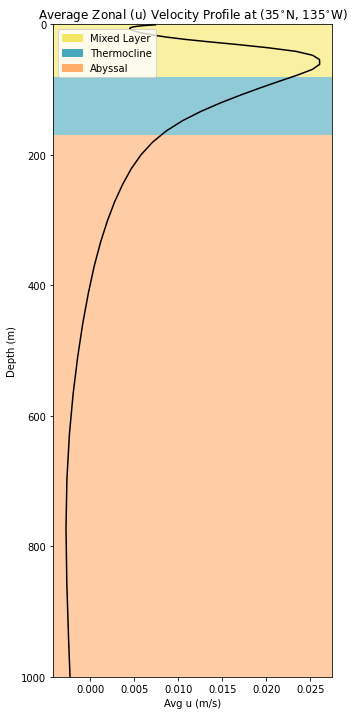

In [ ]:
import matplotlib.patches as mpatches
fig,ax=plt.subplots(figsize=(5,12))

m=plt.plot(avg,lev,color="black")

#for legend
#mxl=plt.axhline(y=0,color='yellow')

#legend
mxl_horiz=mpatches.Patch(color="#F5E663",label='Mixed Layer')
therm_horiz=mpatches.Patch(color='#47A8BD',label="Thermocline")
deep_horiz=mpatches.Patch(color='#FFAD69',label="Abyssal")
if STD:
  std_col=mpatches.Patch(color='darkgrey',label="$\sigma$")
  plt.legend(handles=[mxl_horiz, therm_horiz, deep_horiz, std_col],loc='upper left')
else:
  plt.legend(handles=[mxl_horiz, therm_horiz, deep_horiz],loc='upper left')
plt.title('Average Zonal (u) Velocity Profile at (35$^{\circ}$N, 135$^{\circ}$W)')
#plt.title('Average ' + direction + ' at (35N,135W) 1979-2018 ' + model) #EPGP 30-40N, 150-160W... 0-60, 120-280... 35N, 135W

if salt:
  plt.xlabel('Avg ' + direction + ' (PSU)')
elif temp:
  plt.xlabel('Avg ' + direction + ' (deg C)')
elif U:
  plt.xlabel('Avg ' + direction + ' (m/s)')
elif V:
  plt.xlabel('Avg ' + direction + ' (m/s)')

plt.ylabel('Depth (m)')
plt.ylim(0,1000)
plt.gca().invert_yaxis()
if STD:
  s1=plt.plot(std_positive,lev, color="red",linewidth=0)
  s2=plt.plot(std_negative,lev, color="red",linewidth=0)
  plt.fill_betweenx(lev,std_positive,std_negative,color="darkgrey")
  if layers:
    #mixed layer
    for i in range(0,80):
      plt.axhspan(i,i+1,facecolor='#F5E663',alpha=0.6)
    #thermocline
    for i in range(80,170):
      plt.axhspan(i,i+1,facecolor='#47A8BD',alpha=0.6)
    #abyss
    for i in range(170,5000):
      plt.axhspan(i,i+1, facecolor='#FFAD69',alpha=0.6)
  plt.savefig('/content/drive/MyDrive/REU_2022_copy/plots_copy/Avg_Velo_Salt_Temp_Depth/' + experiment + '.png',format='png')
else:
    if layers:
      for i in range(0,80):
        plt.axhspan(i,i+1,facecolor='#F5E663',alpha=0.6)
    #thermocline
      for i in range(80,170):
        plt.axhspan(i,i+1,facecolor='#47A8BD',alpha=0.6)
      for i in range(170,5300):
        plt.axhspan(i,i+1, facecolor='#FFAD69',alpha=0.6)
plt.savefig('/content/drive/MyDrive/REU_2022_copy/plots_copy/Avg_Velo_Salt_Temp_Depth/' + experiment + '_No_STD.png',format='png')

# Calculation of Terminal Velocity

See ipad for calculation... Assume unit cube with density of 1.40g/cm<sup>3</sup>

# Calculation of Amount of Time to Reach Terminal Velocity

I just followwed [this youtube video](https://www.youtube.com/watch?v=E1ZEZ_UVCXc) for the most part

## This ended up being for turbulent flow... see part_sink.ipynb for updated calculations

Assume that the density of water is constant at 1.0 g/cm^3= 10^6 g/m^3.

We want to know when velocity reaches terminal velocity (maximum speed). We have calculated that, for a PET plastic unit cube (0.01m x 0.01m x 0.01m), the terminal velocity is 0.209272 m/s. PET has a density of 1.40*10^6 g/m^3, and since ρ =mass/volume, 1.40*10<sup>6</sup> g/m<sup>3</sup> = mass/10<sup>-6</sup>m<sup>3</sup>. So mass=1.40g. 

Let C<sub>d</sub> = drag coefficient for a square = 1.28
<br> 
Let A=area of cube (0.01m*0.01m)= 0.0001m<sup>2</sup>


We account for 3 different forces acting on the plastic:


1.   Gravity (downward force): F<sub>G</sub>= mass*gravity
2.   Drag (upwawrd force): F<sub>D</sub> = 1/2 * ρ<sub>cube</sub> v<sup>2</sup> * C<sub>d</sub> * A
3.   Buoyant Force (upward force): F<sub>B</sub> = ρ<sub>water</sub> * (volume of displaced water) * gravity

Then, we create a while loop to determine velocity of particle over time. We can solve for Net Force so that we can find acceleration since F<sub>net</sub>=mass*acceleration. Then solve for velocity and then for position. When velocity=terminal velocity, the while loop should stop and output the position (height) of the particle at that time. This gives how much far the particle must fall in order to reach terminal velocity.

**I don't know how to check the accuracy of this, as it seems as though the code is only running through one iteration of the loop. I also don't know any physics, so there may be some problems with how I accounted for the forces acting on the plastic. It should take longer than 0.01 seconds to reach terminal velocity??**




In [ ]:
# We don't need to use this
v_terminal=-0.209272
#v_terminal=-0.209272
m=1.40 #grams
g=-9.81 # or 9.81? m/s^2
l=0.01 #m
rho_water=10.26*(10**5) # g/m^3
#rho_cube=1.04*rho_water
C_d=1.28 # based on seawater & cube

y=0.0
v=0.0
t=0.0
dt=0.1

#F=(0.5*rho_cube*(v**2)*1.28*0.0001)-(m*g)+(rho_water*0.000001*g)
#print(F)
while v>v_terminal:  
  F=((l**3)*rho_water*g)+(0.5*C_d*(v**2)*rho_water*(l**2))-(m*g)
  #F=(0.5*rho_water*(v**2)*1.28*0.0001)-(m*g)+(rho_water*0.000001*g)
  a=F/m
  v=v+a*dt
  print(F)
  y=y+v*dt
  t=t+dt
  print("depth v_terminal is reached =", -y, "m")
  print("time to reach terminal =", t, "seconds")
  # does this even make sense? it feels like it is only completing one iteration of the loop

For a 0.01m x 0.01m cube

In [ ]:
import numpy as np
g=9.81 #m/s^2
print('g is of type', type(g))
l=0.01 #m
print('l is of type', type(l))
rho_water=1025000.0 #g/m^3
print('rho_water is of type', type(rho_water))
C_d=1.28
print('C_d is of type', type(C_d))
m=1.40 #g
print('m is of type', type(m))

v_terminal=np.sqrt(2.0*[(1.4*9.8)-((0.01**3.0)*1025000*9.8)]/(1.28*1025000*(0.01**2.0)))
#print(v_terminal)
# according to wolfram alpha, v_terminal=0.209272